In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement:

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. The task is to make a model which predicts the claim status and provide recommendations to management.


### Approach:
Using CART, Random Forest & Artificial Neural Networks. Comparing the models performances in train and test sets.


In [ ]:
df2 = pd.read_csv('insurance_part2_data.csv')

In [3]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df2.shape

(3000, 10)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df2.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
df2.duplicated().sum()

139

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

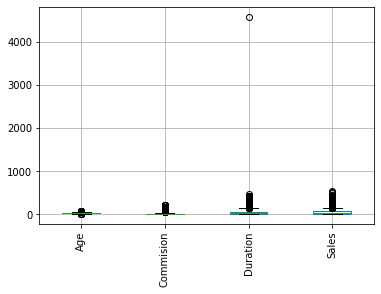

In [10]:
df2.boxplot()
plt.xticks(rotation=90)

In [11]:
df2.Duration.max()

4580

In [12]:
for feature in df2:
    print(feature.upper(),': ',df2[feature].nunique())
    print(df2[feature].value_counts().sort_values())
    print('\n')


AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
11      81
10      81
6       81
5       82
8       83
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
2

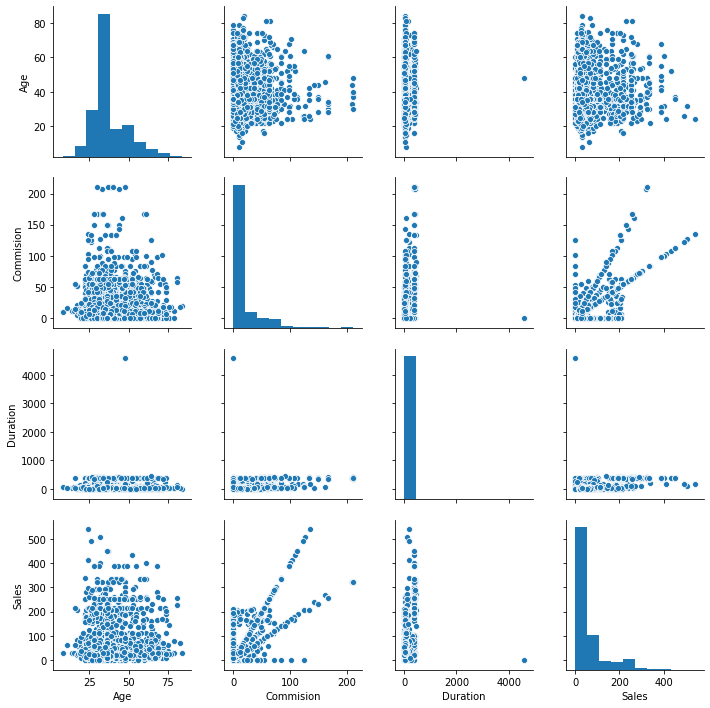

In [28]:
sns.pairplot(df2)

In [13]:
df2.var()

Age            109.485214
Commision      649.304524
Duration     17970.290762
Sales         5003.292182
dtype: float64

In [14]:
df2.cov()

,Age,Commision,Duration,Sales
Age,109.485214,18.055091,42.676437,29.201372
Commision,18.055091,649.304524,1610.204119,1381.552303
Duration,42.676437,1610.204119,17970.290762,5299.841484
Sales,29.201372,1381.552303,5299.841484,5003.292182


In [15]:
corr = df2.corr()
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


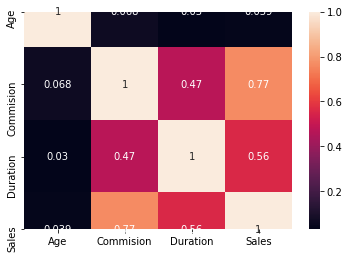

In [16]:
sns.heatmap(corr, annot=True)

In [17]:
for feature in df2:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [19]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

## Data Split: Splitting the data into test and train, building classification models on CART, Random Forest, Artificial Neural Network


In [20]:
x = df2.drop('Claimed', axis=1)
y = df2.pop('Claimed')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [26]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


x_train (2100, 9)
x_test (900, 9)
y_train (2100,)
y_test (900,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
param_grid =  {
    'criterion': ['gini'],
    'max_depth': [4,6,8,10],
    'min_samples_leaf': [30,60,100,150],
    'min_samples_split': [45,90,150,200],
    'random_state': [0]
}


In [30]:
grid_search = GridSearchCV(param_grid=param_grid,estimator=dtree, cv=3)

In [31]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid_dtree = grid_search.best_estimator_
best_grid_dtree


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 150, 'random_state': 0}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
print (pd.DataFrame(best_grid_dtree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.626710
Sales         0.264199
Product Name  0.088908
Commision     0.011699
Duration      0.008485
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [34]:
rfcl = RandomForestClassifier()

In [35]:
param_grid =  {
    'max_depth': [4,6,8],
    'min_samples_leaf': [30,60,100],
    'min_samples_split': [90,180,300],
    'n_estimators': [101,301],
    'random_state': [0],
    'max_features': [4,6]
}


In [36]:
grid_search = GridSearchCV(param_grid=param_grid,estimator=rfcl, cv=3)

In [37]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid_rforest = grid_search.best_estimator_
best_grid_rforest


{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 30, 'min_samples_split': 180, 'n_estimators': 301, 'random_state': 0}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=180,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [159]:
print (pd.DataFrame(best_grid_rforest.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.346448
Product Name  0.272245
Sales         0.169082
Commision     0.109182
Duration      0.042664
Type          0.038669
Age           0.013375
Destination   0.008335
Channel       0.000000


In [38]:
mlp = MLPClassifier()

In [146]:
param_grid = {
    'hidden_layer_sizes': [100, 150, 200],
    'max_iter': [10000],
    'solver': ['adam','sgd'],
    'tol': [0.001],
    'random_state': [0],
    'n_iter_no_change':[2,5,10]
}

In [147]:
grid_search = GridSearchCV(param_grid=param_grid,estimator=mlp, cv=3)

In [148]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid_ann = grid_search.best_estimator_
best_grid_ann

{'hidden_layer_sizes': 150, 'max_iter': 10000, 'n_iter_no_change': 5, 'random_state': 0, 'solver': 'adam', 'tol': 0.001}


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=5, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Performance Metrics: Checking the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and getting ROC_AUC score for each model


In [42]:
## Predicting for Decision Tree

train_predict_dtree = best_grid_dtree.predict(x_train)
test_predict_dtree = best_grid_dtree.predict(x_test)
train_predict_probs_dtree = best_grid_dtree.predict_proba(x_train)
test_predict_probs_dtree = best_grid_dtree.predict_proba(x_test)

In [43]:
## Predicting for Random Forest

train_predict_rforest = best_grid_rforest.predict(x_train)
test_predict_rforest = best_grid_rforest.predict(x_test)
train_predict_probs_rforest = best_grid_rforest.predict_proba(x_train)
test_predict_probs_rforest = best_grid_rforest.predict_proba(x_test)

In [149]:
## Predicting for Artificial neural Networks

train_predict_ann = best_grid_ann.predict(x_train)
test_predict_ann = best_grid_ann.predict(x_test)
train_predict_probs_ann = best_grid_ann.predict_proba(x_train)
test_predict_probs_ann = best_grid_ann.predict_proba(x_test)

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

AUC: 0.810


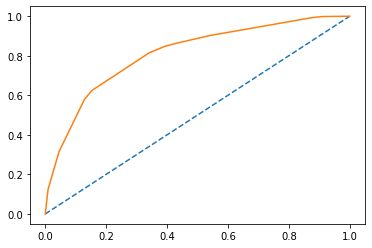

In [99]:
## ROC Curve, AUC Score for training set from dtree

# keep probabilities for the positive outcome only
probs = train_predict_probs_dtree[:, 1]
# calculate AUC
dtree_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dtree_train_auc)
# calculate roc curve
dtree_train_fpr, dtree_train_tpr, dtree_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtree_train_fpr, dtree_train_tpr)


AUC: 0.815


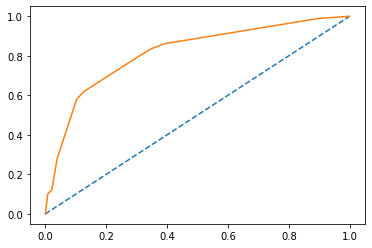

In [100]:
## ROC Curve, AUC Score for testing set from dtree

# keep probabilities for the positive outcome only
probs = test_predict_probs_dtree[:, 1]
# calculate AUC
dtree_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dtree_test_auc)
# calculate roc curve
dtree_test_fpr, dtree_test_tpr, dtree_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtree_test_fpr, dtree_test_tpr)


AUC: 0.825


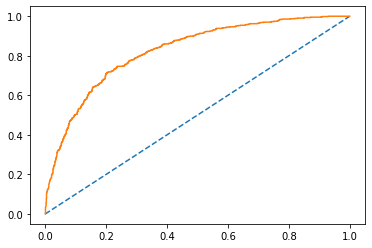

In [101]:
## ROC Curve, AUC Score for training set from rforest

# keep probabilities for the positive outcome only
probs = train_predict_probs_rforest[:, 1]
# calculate AUC
rforest_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rforest_train_auc)
# calculate roc curve
rforest_train_fpr, rforest_train_tpr, rforest_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rforest_train_fpr, rforest_train_tpr)


AUC: 0.837


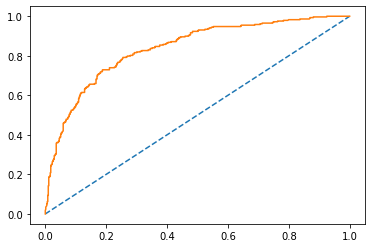

In [102]:
## ROC Curve, AUC Score for testing set from rforest

# keep probabilities for the positive outcome only
probs = test_predict_probs_rforest[:, 1]
# calculate AUC
rforest_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rforest_test_auc)
# calculate roc curve
rforest_test_fpr, rforest_test_tpr, rforest_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rforest_test_fpr, rforest_test_tpr)


AUC: 0.820


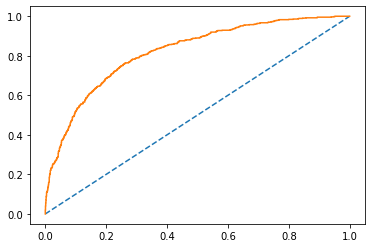

In [150]:
## ROC Curve, AUC Score for training set from ANN

# keep probabilities for the positive outcome only
probs = train_predict_probs_ann[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)


AUC: 0.829


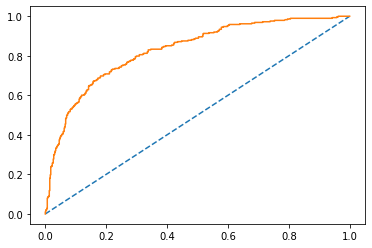

In [151]:
## ROC Curve, AUC Score for testing set from ANN

# keep probabilities for the positive outcome only
probs = test_predict_probs_ann[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)


In [105]:
## Confusion matrix, Classification report and accuracy score for training set of dtree

In [106]:
confusion_matrix(y_train, train_predict_dtree)

array([[1276,  188],
       [ 268,  368]], dtype=int64)

In [107]:
print(classification_report(y_train, train_predict_dtree))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1464
           1       0.66      0.58      0.62       636

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.78      0.78      0.78      2100



In [108]:
dtree_train_accuracy=best_grid_dtree.score(x_train,y_train) 
dtree_train_accuracy

0.7828571428571428

In [109]:
## Confusion matrix, Classification report and accuracy score for testing set of dtree

In [110]:
confusion_matrix(y_test, test_predict_dtree)

array([[549,  63],
       [121, 167]], dtype=int64)

In [111]:
print(classification_report(y_test, test_predict_dtree))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.73      0.58      0.64       288

    accuracy                           0.80       900
   macro avg       0.77      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



In [112]:
dtree_test_accuracy=best_grid_dtree.score(x_test,y_test) 
dtree_test_accuracy

0.7955555555555556

In [113]:
## Confusion matrix, Classification report and accuracy score for training set of rforest

In [114]:
confusion_matrix(y_train, train_predict_rforest)

array([[1311,  153],
       [ 312,  324]], dtype=int64)

In [115]:
print(classification_report(y_train, train_predict_rforest))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1464
           1       0.68      0.51      0.58       636

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [116]:
rforest_train_accuracy=best_grid_rforest.score(x_train,y_train) 
rforest_train_accuracy

0.7785714285714286

In [117]:
## Confusion matrix, Classification report and accuracy score for testing set of rforest

In [118]:
confusion_matrix(y_test, test_predict_rforest)


array([[560,  52],
       [140, 148]], dtype=int64)

In [119]:
print(classification_report(y_test, test_predict_rforest))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       612
           1       0.74      0.51      0.61       288

    accuracy                           0.79       900
   macro avg       0.77      0.71      0.73       900
weighted avg       0.78      0.79      0.77       900



In [120]:
rforest_test_accuracy=best_grid_rforest.score(x_test,y_test) 
rforest_test_accuracy

0.7866666666666666

In [121]:
## Confusion matrix, Classification report and accuracy score for training set of ANN

In [152]:
confusion_matrix(y_train, train_predict_ann)

array([[1323,  141],
       [ 313,  323]], dtype=int64)

In [153]:
print(classification_report(y_train, train_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1464
           1       0.70      0.51      0.59       636

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [154]:
ann_train_accuracy=best_grid_ann.score(x_train,y_train) 
ann_train_accuracy

0.7838095238095238

In [155]:
## Confusion matrix, Classification report and accuracy score for testing set of ANN

In [156]:
confusion_matrix(y_test, test_predict_ann)

array([[562,  50],
       [139, 149]], dtype=int64)

In [157]:
print(classification_report(y_test, test_predict_ann))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       612
           1       0.75      0.52      0.61       288

    accuracy                           0.79       900
   macro avg       0.78      0.72      0.73       900
weighted avg       0.78      0.79      0.78       900



In [158]:
ann_test_accuracy=best_grid_ann.score(x_test,y_test) 
ann_test_accuracy

0.79

## Final Model: Comparing all the models and drawing an inference on which model is best/optimized.

## Decision Tree Classifier Conclusion
<b>Train Data:</b>  
    AUC: 81.0%        
    Accuracy: 78.28%        
    Sensitivity: 58%     
    Precision: 66%        
    f1-Score: 62%       
            
<b>Test Data:</b>      
    AUC: 81.5%      
    Accuracy:79.55%      
    Sensitivity: 58%    
    Precision: 73%       
    f1-Score: 64%     
    
### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
### Agency Code is the most important variable for predicting Claim Status
    
    
## ---------------------------------------------------------------------------------------------------------------------------------
    

## Random Forest Conclusion
<b>Train Data:</b>  
    AUC: 82.5%        
    Accuracy: 77.85%        
    Sensitivity: 51%     
    Precision: 68%        
    f1-Score: 58%       
            
<b>Test Data:</b>      
    AUC: 83.7%      
    Accuracy:78.66%      
    Sensitivity: 51%    
    Precision: 74%       
    f1-Score: 61%  

### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
### Agency Code is the most important variable for predicting Claim Status


## ---------------------------------------------------------------------------------------------------------------------------------


## Artificial Neural Networks Conclusion
<b>Train Data:</b>  
    AUC: 82.0%        
    Accuracy: 78.38%        
    Sensitivity: 51%     
    Precision: 70%        
    f1-Score: 59%       
            
<b>Test Data:</b>      
    AUC: 82.9%      
    Accuracy: 79%      
    Sensitivity: 52%    
    Precision: 75%       
    f1-Score: 61%  

### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  


## ---------------------------------------------------------------------------------------------------------------------------------

## Overall Conclusion:


## Out of the 3 models, Artificial Neural Networks has slightly better performance than the CART and Random Forest
## If we consider Recall as an imp factor, decision tree classifier has better results compared to the other two.

## Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.

## From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a person has diabetes or not. If change is yes, then those patients have more chances of getting diabetes.


## Inference based on these predictions, these are the business insights and recommendations

### From the Decision Tree and Random Forest predicive models, we found that the variable 'Agency' is contributing the most when it comes to prediction.
### So, the company should investigate further and check which are the agencies having higher claim rate.
    
### Sales and the Product name are the other two variables which are important variables in contributing to the predictions. 
### The company need to investigate the products and find the products from which the claims are higher.
### we may recommend to take safety measures and help prevent any loss or damage which would help in reducing the claims.


### The feature importance for variables Age, Destination and Channel are almost 0 or negligible.
### These variables are not contributing much for the predictions.
### We may choose not to consider these variables in our predictions.

